<h1>Testing the results with standard data</h1>

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [6]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

In [7]:
from models import HyperPars as AlignmentHyperPars
from discretisation.adduct_cluster import AdductCluster, Peak, Possible
from shared_bin_matching import SharedBinMatching as Aligner
from ground_truth import GroundTruth

In [8]:
input_dir = '/home/joewandy/git/metabolomics_tools/alignment/input/std1_csv_4'
database_file = None
transformation_file = '/home/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'
gt_file = '/home/joewandy/git/metabolomics_tools/alignment/input/std1_csv_4/ground_truth/ground_truth.txt'

In [9]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 5
hp.within_file_rt_tol = 10
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 120
hp.alpha_mass = 1.0
hp.dp_alpha = 1000.0
hp.t = 0.0
hp.mass_clustering_n_iterations = 200
hp.rt_clustering_nsamps = 400
hp.rt_clustering_burnin = 200

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=120, alpha_mass=1.0, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=200, rt_clustering_burnin=200, rt_clustering_nsamps=400, t=0.0, within_file_mass_tol=5, within_file_rt_tol=10


<h2>Simple matching</h2>

In [7]:
match_mode = 0
aligner0 = Aligner(input_dir, database_file, transformation_file, 
                       hp, verbose=True, seed=1234567890)
aligner0.run(match_mode, show_singleton=False)

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=120, alpha_mass=1.0, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=200, rt_clustering_burnin=200, rt_clustering_nsamps=400, t=0.0, within_file_mass_tol=5, within_file_rt_tol=10
1147 features read from std1-file1.txt
1131 features read from std1-file2.txt
954 features read from std1-file3.txt
1678 features read from std1-file4.txt
[M+ACN+H, 2M+H, 2M+Na, M+ACN+2H, M+2ACN+2H, M+2H, M+H, M+H+NH4, M+2ACN+H, M+NH4, 2M+ACN+H, M+CH3OH+H, M+ACN+Na, M+Na]
Match mode 0
Matching peak features
Processing file 0
Processing file 1
Computing score matrix
Running matching

Processing file 2
Computing score matrix
Running matching

Processing file 3
Computing score matrix
Running matching


REPORT
1. avg m/z=90.5259127688 avg RT=2125.79329427 prob=1.0
	feature_id   199 file_id 0 mz 90.52591 RT 2129.13 intensity 7.4456e+05	None
	feature_id   292 file_id 2 mz 90.52591 RT 2127.96 intensity 2.4903e+05	None
	feature_id   528 file_id 3 mz 9

In [8]:
match0_performance = aligner0.evaluate_performance(gt_file, verbose=False)
for results in match0_performance:
    print "tp=%d, fp=%d, fn=%d, prec=%.3f, rec=%.3f, f1=%.3f, th_prob=%.3f" % results

Loaded 104 ground truth entries
{2: 17, 3: 9, 4: 78}

TP ps_keys = 
(477, 2) (905, 0) (329, 3) (788, 1) 
TP gt_item = 
(788, 1) (905, 0) (329, 3) (477, 2) 

TP ps_keys = 
(244, 2) (156, 3) 
TP gt_item = 
(244, 2) (156, 3) 

TP ps_keys = 
(454, 1) (464, 0) (725, 3) (250, 2) 
TP gt_item = 
(464, 0) (454, 1) (725, 3) (250, 2) 

TP ps_keys = 
(891, 2) (1635, 3) 
TP gt_item = 
(891, 2) (1635, 3) 

TP ps_keys = 
(992, 3) (1111, 0) (1087, 1) 
TP gt_item = 
(992, 3) (1111, 0) (1087, 1) 

TP ps_keys = 
(195, 2) (215, 0) (75, 3) (186, 1) 
TP gt_item = 
(195, 2) (215, 0) (75, 3) (186, 1) 

TP ps_keys = 
(85, 2) (84, 1) (93, 0) (77, 3) 
TP gt_item = 
(84, 1) (85, 2) (93, 0) (77, 3) 

TP ps_keys = 
(509, 1) (544, 0) (524, 3) (662, 2) 
TP gt_item = 
(509, 1) (662, 2) (524, 3) (544, 0) 

TP ps_keys = 
(9, 2) (9, 0) (12, 1) (11, 3) 
TP gt_item = 
(9, 2) (9, 0) (12, 1) (11, 3) 

TP ps_keys = 
(657, 1) (749, 0) (675, 3) 
TP gt_item = 
(657, 1) (749, 0) (675, 3) 

TP ps_keys = 
(449, 3) (624, 2) 
TP gt_i

<hr/>

<h2>Matching the precursor clusters</h2>

In [10]:
match_mode = 1
aligner1 = Aligner(input_dir, database_file, transformation_file, 
                       hp, verbose=True, seed=1234567890, parallel=False, mh_biggest=True)
aligner1.run(match_mode, show_singleton=False)

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=120, alpha_mass=1.0, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=200, rt_clustering_burnin=200, rt_clustering_nsamps=400, t=0.0, within_file_mass_tol=5, within_file_rt_tol=10
1147 features read from std1-file1.txt
1131 features read from std1-file2.txt
954 features read from std1-file3.txt
1678 features read from std1-file4.txt
[M+ACN+H, 2M+H, 2M+Na, M+ACN+2H, M+2ACN+2H, M+2H, M+H, M+H+NH4, M+2ACN+H, M+NH4, 2M+ACN+H, M+CH3OH+H, M+ACN+Na, M+Na]
Match mode 1
First stage clustering -- within_file_mass_tol=5.00, within_file_rt_tol=10.00, alpha=1.00
[M+ACN+H, 2M+H, 2M+Na, M+ACN+2H, M+2ACN+2H, M+2H, M+H, M+H+NH4, M+2ACN+H, M+NH4, 2M+ACN+H, M+CH3OH+H, M+ACN+Na, M+Na]
Created 1147 clusters
Assigning possible transformations 0/1147
Assigning possible transformations 500/1147
Assigning possible transformations 1000/1147
132 peaks to be re-sampled in stage 1
VB step 0 file 0 
VB step 1 file 0 
VB step 2 file 0 
VB step 3 file

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:    7.5s


[M+ACN+H, 2M+H, 2M+Na, M+ACN+2H, M+2ACN+2H, M+2H, M+H, M+H+NH4, M+2ACN+H, M+NH4, 2M+ACN+H, M+CH3OH+H, M+ACN+Na, M+Na]
Created 954 clusters
Assigning possible transformations 0/954
Assigning possible transformations 500/954
86 peaks to be re-sampled in stage 1
VB step 0 file 2 
VB step 1 file 2 
VB step 2 file 2 
VB step 3 file 2 
VB step 4 file 2 
VB step 5 file 2 
VB step 6 file 2 
VB step 7 file 2 
VB step 8 file 2 
VB step 9 file 2 
VB step 10 file 2 
VB step 11 file 2 
VB step 12 file 2 
VB step 13 file 2 
VB step 14 file 2 
VB step 15 file 2 
VB step 16 file 2 
VB step 17 file 2 
VB step 18 file 2 
VB step 19 file 2 
VB step 20 file 2 
VB step 21 file 2 
VB step 22 file 2 
VB step 23 file 2 
VB step 24 file 2 
VB step 25 file 2 
VB step 26 file 2 
VB step 27 file 2 
VB step 28 file 2 
VB step 29 file 2 
VB step 30 file 2 
VB step 31 file 2 
VB step 32 file 2 
VB step 33 file 2 
VB step 34 file 2 
VB step 35 file 2 
VB step 36 file 2 
VB step 37 file 2 
VB step 38 file 2 
VB step 3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.7s finished


In [11]:
match1_performance = aligner1.evaluate_performance(gt_file, verbose=False)
for results in match1_performance:
    print "tp=%d, fp=%d, fn=%d, prec=%.3f, rec=%.3f, f1=%.3f, th_prob=%.3f" % results

Loaded 104 ground truth entries
{2: 17, 3: 9, 4: 78}

TP ps_keys = 
(697, 3)(mz=74.0601,rt=1043.41,precursor=M+H@73.05281(rt=1043.41,members=1,prob=1.0000))
(710, 2)(mz=74.0601,rt=1054.04,precursor=M+H@73.05280(rt=1054.04,members=1,prob=1.0000))
(697, 1)(mz=74.0600,rt=1052.51,precursor=M+H@73.05271(rt=1052.51,members=1,prob=1.0000))
(693, 0)(mz=74.0600,rt=1051.68,precursor=M+H@73.05272(rt=1051.68,members=1,prob=1.0000))

TP gt_item = 
(693, 0)(mz=74.0600,rt=1051.68,precursor=M+H@73.05272(rt=1051.68,members=1,prob=1.0000))
(710, 2)(mz=74.0601,rt=1054.04,precursor=M+H@73.05280(rt=1054.04,members=1,prob=1.0000))
(697, 1)(mz=74.0600,rt=1052.51,precursor=M+H@73.05271(rt=1052.51,members=1,prob=1.0000))
(697, 3)(mz=74.0601,rt=1043.41,precursor=M+H@73.05281(rt=1043.41,members=1,prob=1.0000))


FP ps_keys = 
(133, 1)(mz=198.0026,rt=810.67,precursor=M+H@196.99534(rt=810.67,members=1,prob=1.0000))
(160, 3)(mz=198.0027,rt=815.56,precursor=M+H@196.99544(rt=815.56,members=1,prob=1.0000))
(151, 0)(mz

In [31]:
def find_peak(key, ac):
    for p in ac.peaks:
        if p._get_key() == key:
            break
        else:
            p = None
    return p

def check(peak, cluster, mass_tol, rt_tol, transformations):
    # Check RT first
    if np.abs(peak.rt - cluster.mHPeak.rt) > rt_tol:
        return None
    else:
        for t in transformations:
            tm = t.transform(peak)
            if np.abs((tm - cluster.M)/cluster.M)*1e6 < mass_tol:
                return t
        return None
    
def display_probs(p, ac):
    print "Peak {}: {},{},{}".format(p._get_key(), p.mass,p.rt,p.intensity)
    for poss in ac.possible[p]:
        print "\t Cluster {}: {} {} ({} = {}), prob = {}".format(poss.cluster.id,poss.cluster.mHPeak._get_key(), poss.cluster.M,
            poss.transformation.name,poss.transformed_mass,poss.prob)

def display_possible_trans(p, ac, transformations, mass_tol, rt_tol, mh_biggest):
    found = []
    for c in ac.clusters:
        if p is c.mHPeak:
            continue
        if mh_biggest and p.intensity > c.mHPeak.intensity:
            continue
        t = check(p, c, mass_tol, rt_tol, transformations)
        if t is not None:
            transformed_mass = t.transform(p)
            poss = Possible(c, t, transformed_mass, p.rt)
            print "Possible trans %s @ %f into cluster %d" % (poss.transformation.name, transformed_mass, c.id)
            print "- Todo peak %s %f %f %f" % (p._get_key(), p.mass, p.rt, p.intensity)
            print "- M+H peak %s %f %f %f" % (c.mHPeak._get_key(), c.M, c.mHPeak.rt, c.mHPeak.intensity)
            print
            found.append(c)  
    if len(found) > 0:
        for c in found:
            ac.cluster_plot(c)                    
    else:
        print "No possible trans"

<hr/>

**1. M+H biggest assumption**

    FP 
    gt_item = 
    (41, 2)(mz=133.0595,rt=1813.73,precursor=M+2H@264.10444(rt=1813.34,members=3,prob=1.00))
    (35, 0)(mz=133.0593,rt=1768.40,precursor=M+2H@264.10409(rt=1769.16,members=3,prob=1.00))
    (38, 1)(mz=133.0593,rt=1767.17,precursor=M+2H@264.10404(rt=1765.65,members=3,prob=1.00))
    (24, 3)(mz=133.0595,rt=1806.03,precursor=M+H@132.05221(rt=1806.03,members=1,prob=1.00))

In [12]:
ac = aligner1.clustering_results[3]
transformations = ac.transformations
mass_tol = 5
rt_tol = 10
mh_biggest = True

In [13]:
p = find_peak((24, 3), ac)
display_probs(p, ac)

Peak (24, 3): 133.059490989,1806.0300293,7511134.0
	 Cluster 23: (24, 3) 132.052214537 (M+H = 132.052214537), prob = 1.0


In [14]:
display_possible_trans(p, ac, transformations, mass_tol, rt_tol, False)

Possible trans M+2H into cluster 27
- Todo peak (24, 3) 133.059491 1806.030029 7511134.000000
- M+H peak (28, 3) 264.104526 1804.550049 6951047.500000

CLUSTER 27


So we see that peak (24, 3) has no possible transformation apart from to its own cluster, unless we disable the mh_biggest assumption. This is because the intensity of peak (24, 3) = 7511134 is just a bit larger than the intensity of the M+H peak (28, 3), which is 6951047.

We fixed this by adding a two-stage possible assignments. First, we perform the possible assignment as before (with the mh_biggest check). Then we do another stage of assignments, where a transformation into a cluster is possible only if another possible transformation is already present from stage 1.

<hr/>

**2. Huge RT drift within file**

The two peaks below (988, 0) and (1098, 3) should be StdMix1_84;M+ACN+2H, according to MetAssign.

    FP ps_keys = 
    (903, 1)(mz=95.0468,rt=2050.35,precursor=M+H@94.03954(rt=2050.35,members=1,prob=1.0000))
    (1098, 3)(mz=95.0469,rt=2061.18,precursor=M+H@94.03961(rt=2061.18,members=1,prob=1.0000))
    (988, 0)(mz=95.0469,rt=2066.06,precursor=M+H@94.03959(rt=2066.06,members=1,prob=1.0000))

    FP gt_item = 
    (1098, 3)(mz=95.0469,rt=2061.18,precursor=M+H@94.03961(rt=2061.18,members=1,prob=1.0000))
    (988, 0)(mz=95.0469,rt=2066.06,precursor=M+H@94.03959(rt=2066.06,members=1,prob=1.0000))

but we see they got assigned to M+H ...

Peak (988, 0): 95.0468658046,2066.06005859,69293.0625
	 Cluster 987: (988, 0) 94.0395893526 (M+H = 94.0395893526), prob = 1.0
Possible trans M+ACN+2H into cluster 126
- Todo peak (988, 0) 95.046866 2066.060059 69293.062500
- M+H peak (127, 0) 147.052920 1018.179993 1334093.500000

CLUSTER 126
Peak: 148.060196076,1018.17999268,1334093.5 -> M+H,147.052919624 (p=1.0)


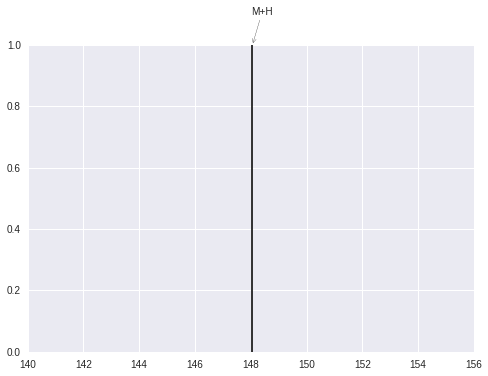

In [15]:
ac = aligner1.clustering_results[0]
transformations = ac.transformations
mass_tol = 5
rt_tol = 1500
mh_biggest = True

p = find_peak((988, 0), ac)
display_probs(p, ac)
display_possible_trans(p, ac, transformations, mass_tol, rt_tol, mh_biggest)

So we see a huge difference in RT between the time of peak (988, 0) at 2066s to its precursor peak (127, 0) at 1018s.

Same with peak (1098, 3) below with RT=2061s to its precursor peak (82, 3) at 1016s.

Peak (1098, 3): 95.0468904725,2061.17993164,102102.375
	 Cluster 1097: (1098, 3) 94.0396140205 (M+H = 94.0396140205), prob = 1.0
Possible trans M+ACN+2H into cluster 81
- Todo peak (1098, 3) 95.046890 2061.179932 102102.375000
- M+H peak (82, 3) 147.053075 1016.419983 2605550.000000

CLUSTER 81
Peak: 148.060351907,1016.41998291,2605550.0 -> M+H,147.053075455 (p=1.0)


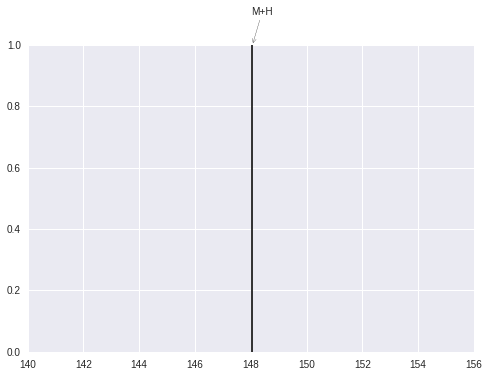

In [16]:
ac = aligner1.clustering_results[3]
transformations = ac.transformations
mass_tol = 5
rt_tol = 1500
mh_biggest = True

p = find_peak((1098, 3), ac)
display_probs(p, ac)
display_possible_trans(p, ac, transformations, mass_tol, rt_tol, mh_biggest)

<hr/>

**3. Check ...**

Peak (657, 1) below is not clustered as 2M+Na. Why?

    FP ps_keys = 
    (675, 3)(mz=537.1950,rt=1193.35,precursor=2M+Na@257.10291(rt=1188.45,members=4,prob=0.9999))
    (749, 0)(mz=537.1943,rt=1198.04,precursor=2M+Na@257.10241(rt=1192.77,members=3,prob=0.9997))

    FP gt_item = 
    (657, 1)(mz=537.1940,rt=1204.09,precursor=M+H@536.18675(rt=1204.09,members=1,prob=1.0000))
    (749, 0)(mz=537.1943,rt=1198.04,precursor=2M+Na@257.10241(rt=1192.77,members=3,prob=0.9997))
    (675, 3)(mz=537.1950,rt=1193.35,precursor=2M+Na@257.10291(rt=1188.45,members=4,prob=0.9999))

Peak (657, 1): 537.194023267,1204.08996582,141869.53125
	 Cluster 656: (657, 1) 536.186746815 (M+H = 536.186746815), prob = 1.0
Possible trans 2M+Na into cluster 134
- Todo peak (657, 1) 537.194023 1204.089966 141869.531250
- M+H peak (135, 1) 257.102337 1187.989990 1082928.750000

CLUSTER 134
Peak: 258.109613911,1187.98999023,1082928.75 -> M+H,257.102337459 (p=1.0)
Peak: 280.091441396,1187.98999023,833302.4375 -> M+Na,257.102220316 (p=0.999720210048)


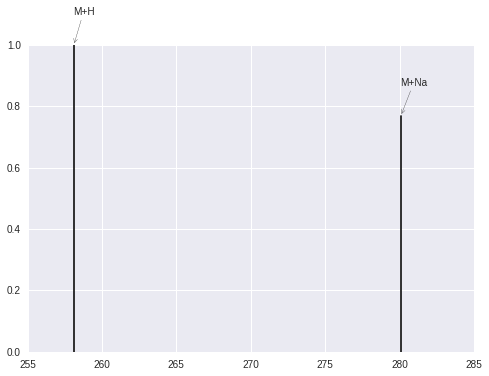

In [26]:
ac = aligner1.clustering_results[1]
transformations = ac.transformations
mass_tol = 5
rt_tol = 20
mh_biggest = True
p = find_peak((657, 1), ac)
display_probs(p, ac)
display_possible_trans(p, ac, transformations, mass_tol, rt_tol, mh_biggest)

Need to increase within_file_rt_tol to 20 or maybe 30.

**4. Check ..**

    FP ps_keys = 
    (67, 0)(mz=263.0735,rt=820.30,precursor=M+H@262.06625(rt=820.30,members=1,prob=1.0000))
    (89, 2)(mz=263.0738,rt=821.63,precursor=M+H@262.06648(rt=821.63,members=1,prob=1.0000))
    (207, 3)(mz=263.0737,rt=811.27,precursor=M+H@262.06643(rt=811.27,members=1,prob=1.0000))
    (71, 1)(mz=263.0735,rt=820.76,precursor=M+H@262.06623(rt=820.76,members=1,prob=1.0000))

    FP gt_item = 
    (67, 0)(mz=263.0735,rt=820.30,precursor=M+H@262.06625(rt=820.30,members=1,prob=1.0000))
    (68, 2)(mz=263.0737,rt=787.05,precursor=M+H@262.06646(rt=787.05,members=1,prob=1.0000))
    (62, 1)(mz=263.0734,rt=782.92,precursor=M+H@262.06613(rt=782.92,members=1,prob=1.0000))
    (148, 3)(mz=263.0737,rt=780.79,precursor=M+H@262.06645(rt=780.79,members=1,prob=1.0000))

These peaks should be the 2M+Na peak according to MetAssign. Matching by features alone produce the same mistake too. Again here we need to set huge mass_tol and rt_tol to even see 2M+Na as a possible transformation. 

Maybe the ground truth is incorrect?

Peak (67, 0): 263.07352671,820.302001953,2236293.75
	 Cluster 66: (67, 0) 262.066250258 (M+H = 262.066250258), prob = 1.0
Possible trans M+H @ 262.066250 into cluster 67
- Todo peak (67, 0) 263.073527 820.302002 2236293.750000
- M+H peak (68, 0) 262.066158 783.773987 2233422.250000

Possible trans M+H @ 262.066250 into cluster 191
- Todo peak (67, 0) 263.073527 820.302002 2236293.750000
- M+H peak (192, 0) 262.066058 849.078003 759761.062500

Possible trans M+H+NH4 @ 507.105951 into cluster 255
- Todo peak (67, 0) 263.073527 820.302002 2236293.750000
- M+H peak (256, 0) 507.194828 753.552002 532605.125000

Possible trans M+NH4 @ 245.039701 into cluster 476
- Todo peak (67, 0) 263.073527 820.302002 2236293.750000
- M+H peak (477, 0) 245.089638 824.591980 248920.218750

Possible trans M+NH4 @ 245.039701 into cluster 504
- Todo peak (67, 0) 263.073527 820.302002 2236293.750000
- M+H peak (505, 0) 245.089579 831.726013 222817.984375

Possible trans M+2ACN+H @ 180.013152 into cluster 597
- 

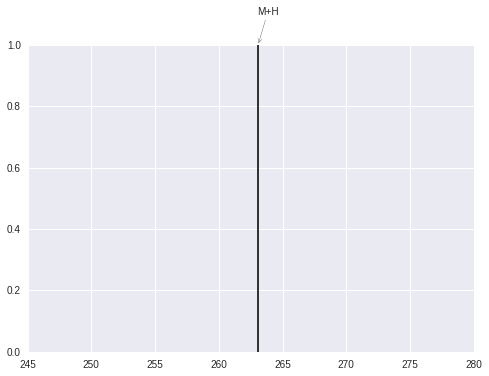

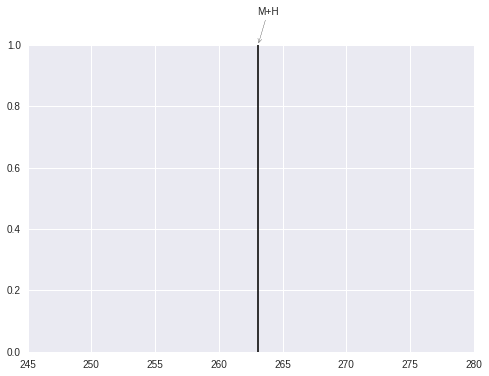

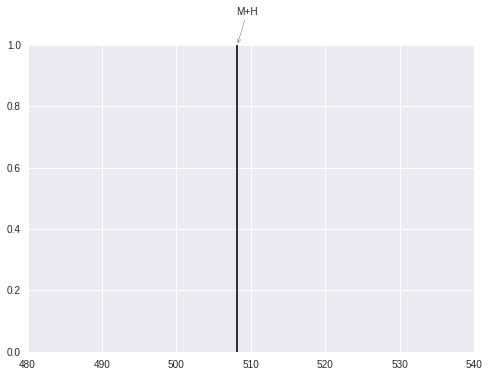

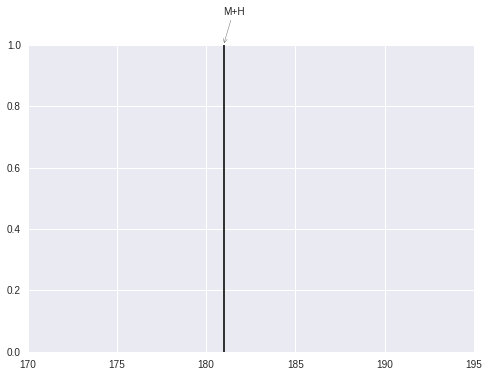

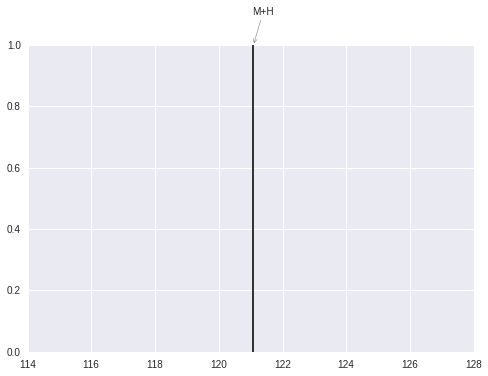

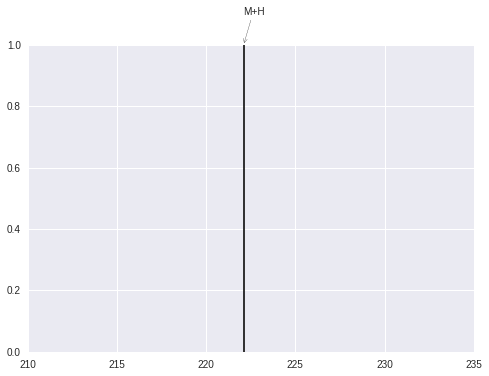

In [37]:
ac = aligner1.clustering_results[0]
transformations = ac.transformations
mass_tol = 300
rt_tol = 100
mh_biggest = False
p = find_peak((67, 0), ac)
display_probs(p, ac)
display_possible_trans(p, ac, transformations, mass_tol, rt_tol, mh_biggest)

**5. Check ..**

    FP gt_item = 
    (52, 2)(mz=365.1057,rt=757.94,precursor=M+H@364.09838(rt=757.94,members=1,prob=1.0000))
    (33, 0)(mz=365.1050,rt=756.58,precursor=M+H@364.09775(rt=756.58,members=1,prob=1.0000))
    (27, 1)(mz=365.1049,rt=758.89,precursor=M+H@364.09768(rt=762.42,members=2,prob=1.0000))
    (98, 3)(mz=365.1056,rt=754.24,precursor=M+H@364.09831(rt=754.24,members=1,prob=1.0000))
    
These should be M+Na according to MetAssign. Can't find any possible transformation at all ...?

In [60]:
ac = aligner1.clustering_results[0]
transformations = ac.transformations
mass_tol = 5
rt_tol = 30
mh_biggest = False
p = find_peak((33, 0), ac)
display_probs(p, ac)
display_possible_trans(p, ac, transformations, mass_tol, rt_tol, mh_biggest)

Peak (33, 0): 365.105024406,756.57598877,3497350.25
	 Cluster 32: (33, 0) 364.097747954 (M+H = 364.097747954), prob = 1.0
No possible trans
